In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline  

In [136]:
df= pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [137]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [138]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


In [139]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [140]:
df.Gender.value_counts()

M    7137
F    6762
Name: Gender, dtype: int64

In [141]:
len(df)

48260

In [142]:
df=df.fillna('unknown')

In [143]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,unknown,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,unknown,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,unknown,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,unknown,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,unknown,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,unknown,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,unknown,61,0


In [144]:
df[df.Duration<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
3753,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.0,6.3,unknown,118,0
10516,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,unknown,118,0
12854,JZI,Airlines,Online,Basic Plan,-2,BANGLADESH,22.0,7.7,M,118,0


In [145]:
df=df[df.Duration>=0]

In [146]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,unknown,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,unknown,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,unknown,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,unknown,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,unknown,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,unknown,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,unknown,61,0


In [147]:
df['Product Name'].value_counts()

Cancellation Plan                       14202
2 way Comprehensive Plan                10000
Rental Vehicle Excess Insurance          6572
Basic Plan                               4206
Bronze Plan                              3057
1 way Comprehensive Plan                 2510
Value Plan                               2082
Silver Plan                              1705
Annual Silver Plan                       1088
Ticket Protector                          807
Travel Cruise Protect                     388
Comprehensive Plan                        279
Gold Plan                                 279
24 Protect                                183
Single Trip Travel Protect Gold           156
Annual Gold Plan                          151
Single Trip Travel Protect Silver         146
Premier Plan                              143
Annual Travel Protect Gold                 77
Annual Travel Protect Silver               64
Individual Comprehensive Plan              53
Single Trip Travel Protect Platinu

In [148]:
df=df.drop(['Distribution Channel'],axis=1)

In [149]:
df

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,unknown,29,0
1,EPX,Travel Agency,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,unknown,36,0
2,EPX,Travel Agency,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,unknown,25,0
3,C2B,Airlines,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Cancellation Plan,90,VIET NAM,10.0,0.00,unknown,23,0
...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,2 way Comprehensive Plan,39,CHINA,44.0,0.00,unknown,36,0
48256,C2B,Airlines,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,unknown,43,0
48258,EPX,Travel Agency,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,unknown,61,0


In [150]:
df[df.Age==0]

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
4593,TST,Travel Agency,Travel Cruise Protect,94,THAILAND,-30.0,10.5,F,0,0
12182,TST,Travel Agency,Travel Cruise Protect,94,THAILAND,30.0,10.5,F,0,0


In [151]:
df=df[df.Age>0]

In [152]:
df['Agency Type'].value_counts()

Travel Agency    34915
Airlines         13340
Name: Agency Type, dtype: int64

In [153]:
df['Agency'].value_counts()

EPX    26712
CWT     6572
C2B     6280
JZI     4848
SSI      807
JWT      580
RAB      577
LWC      532
TST      387
KML      293
ART      248
CCR      155
TTW       72
CBH       70
CSR       66
ADM       56
Name: Agency, dtype: int64

In [154]:
len(df['Destination'].value_counts())

141

In [155]:
df=df.drop('Destination',axis=1)

In [156]:
df.head()

,Agency,Agency Type,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Rental Vehicle Excess Insurance,61,19.8,11.88,unknown,29,0
1,EPX,Travel Agency,Cancellation Plan,93,63.0,0.00,unknown,36,0
2,EPX,Travel Agency,2 way Comprehensive Plan,22,22.0,0.00,unknown,25,0
3,C2B,Airlines,Silver Plan,14,54.5,13.63,M,24,0
4,EPX,Travel Agency,Cancellation Plan,90,10.0,0.00,unknown,23,0


In [157]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [158]:
agency_values = pd.DataFrame(enc.fit_transform(df[['Agency']]).toarray())
#agencyType_values = pd.DataFrame(enc.fit_transform(df[['Agency Type']]).toarray())
product_values = pd.DataFrame(enc.fit_transform(df[['Product Name']]).toarray())
gender_values = pd.DataFrame(enc.fit_transform(df[['Gender']]).toarray())

In [159]:
agency_values= agency_values.add_prefix('Agency_')
#agencyType_values=agency_values.add_prefix('Agency_Type_')
gender_values= gender_values.add_prefix('Gender_')
product_values= product_values.add_prefix('Product_')

In [160]:
df=df.drop(['Agency','Agency Type','Gender'],axis=1)

In [161]:
agency_values.reset_index(drop=True, inplace=True)
#agencyType_values.reset_index(drop=True, inplace=True)
gender_values.reset_index(drop=True, inplace=True)
product_values.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [162]:
#df=pd.concat([df,agency_values, agencyType_values, product_values, gender_values],axis=1)
df=pd.concat([df,agency_values, product_values, gender_values],axis=1)

In [163]:
df

,Product Name,Duration,Net Sales,Commision (in value),Age,Claim,Agency_0,Agency_1,Agency_2,Agency_3,...,Product_19,Product_20,Product_21,Product_22,Product_23,Product_24,Product_25,Gender_0,Gender_1,Gender_2
0,Rental Vehicle Excess Insurance,61,19.8,11.88,29,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cancellation Plan,93,63.0,0.00,36,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2 way Comprehensive Plan,22,22.0,0.00,25,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Silver Plan,14,54.5,13.63,24,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Cancellation Plan,90,10.0,0.00,23,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48250,2 way Comprehensive Plan,39,44.0,0.00,36,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48251,Bronze Plan,20,60.0,15.00,30,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48252,Rental Vehicle Excess Insurance,19,29.7,17.82,43,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48253,2 way Comprehensive Plan,7,20.0,0.00,61,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


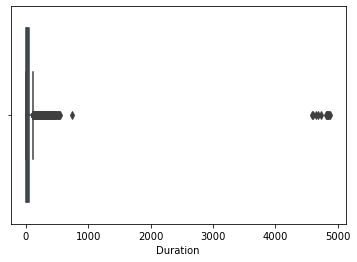

In [164]:
import seaborn as sns
sns.boxplot(x=df['Duration'])

In [165]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['Duration','Net Sales', 'Commision (in value)','Age']]))
print(z)

[[0.10924289 0.42910715 0.1050005  0.77962028]
 [0.41449513 0.45570614 0.49816338 0.28004989]
 [0.26278329 0.38404722 0.49816338 1.06508908]
 ...
 [0.29140069 0.22633744 0.40658243 0.21952051]
 [0.40587028 0.4250108  0.49816338 1.50413009]
 [0.13877456 0.4250108  0.49816338 0.77962028]]


In [166]:
threshold = 3
row,col= np.where(z > 3)

In [167]:
len(row)

4484

In [168]:
row=np.array([row])

In [169]:
len(np.unique(row))

2826

In [170]:
len(df)

48255

In [171]:
#df=df.drop(row)

In [172]:
len(df)

48255

In [173]:
df=df.drop('Product Name',axis=1)

In [174]:
x=df.drop('Claim',axis=1)

In [175]:
y=df['Claim']

In [176]:
y.value_counts()

0    47547
1      708
Name: Claim, dtype: int64

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state=123)

In [178]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25,sampling_strategy=1.0) 

In [179]:
x_train,y_train= sm.fit_sample(x_train,y_train)

In [180]:
# Modelling Algorithms
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [150]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB() , LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']

f1 = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    f1.append(sklearn.metrics.f1_score(pred , y_test))
    
compare = pd.DataFrame({'Algorithm' : model_names , 'Accuracy' : f1})
compare

d:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\python\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\python\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Algorithm,Accuracy
0,LogisticRegression,0.069818
1,LinearSVM,0.032609
2,rbfSVM,0.062587
3,KNearestNeighbors,0.052219
4,RandomForestClassifier,0.043290
5,DecisionTree,0.050682
6,GradientBoostingClassifier,0.071023
7,GaussianNB,0.022288
8,LinearDiscriminantAnalysis,0.072216
9,QuadraticDiscriminantAnalysis,0.021920


In [181]:
gr=GradientBoostingClassifier(random_state=123)
gr.fit(x_train,y_train)
y_pr1=gr.predict(x_train)
y_pr2=gr.predict(x_test)

In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pr1)

0.867738543765881

In [183]:
accuracy_score(y_test,y_pr2)

0.8816607460035524

In [184]:
from sklearn.metrics import f1_score
f1_score(y_train,y_pr1)

0.8648148424556323

In [185]:
f1_score(y_test,y_pr2)

0.1011804384485666

In [186]:
from sklearn.feature_selection import RFE
selector = RFE(gr,step=1)

In [187]:
selector.fit(x_train,y_train)

RFE(estimator=GradientBoostingClassifier(random_state=123))

In [189]:
sely=selector.predict(x_test)

In [190]:
accuracy_score(y_test,sely)

0.8793664890467733

In [191]:
f1_score(y_test,sely)

0.10143329658213893

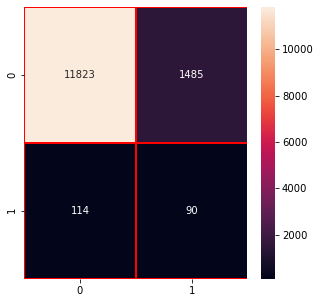

In [52]:
cmsvc = confusion_matrix(y_test,y_pr2)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmsvc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)

In [192]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [193]:
test_data

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.00,0.00,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.00,0.00,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.00,0.00,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.00,0.00,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.00,0.00,NaN,33
...,...,...,...,...,...,...,...,...,...,...
15827,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,MALAYSIA,25.00,0.00,NaN,43
15828,C2B,Airlines,Online,Annual Silver Plan,409,SINGAPORE,252.85,63.21,F,20
15829,JWT,Airlines,Online,Value Plan,54,INDIA,31.00,12.40,F,118
15830,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,30,UNITED ARAB EMIRATES,0.00,11.88,NaN,31


In [194]:
df

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_0,Agency_1,Agency_2,Agency_3,Agency_4,...,Product_19,Product_20,Product_21,Product_22,Product_23,Product_24,Product_25,Gender_0,Gender_1,Gender_2
0,61,19.8,11.88,29,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,93,63.0,0.00,36,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22,22.0,0.00,25,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14,54.5,13.63,24,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,90,10.0,0.00,23,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48250,39,44.0,0.00,36,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48251,20,60.0,15.00,30,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48252,19,29.7,17.82,43,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48253,7,20.0,0.00,61,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [195]:
test_data=test_data.drop(['Distribution Channel','Destination'],axis=1)

In [196]:
test_data.isnull().sum()

Agency                      0
Agency Type                 0
Product Name                0
Duration                    0
Net Sales                   0
Commision (in value)        0
Gender                  11286
Age                         0
dtype: int64

In [197]:
test_data=test_data.fillna('unknown')

In [198]:
agency_values2 = pd.DataFrame(enc.fit_transform(test_data[['Agency']]).toarray())
#agencyType_values2 = pd.DataFrame(enc.fit_transform(test_data[['Agency Type']]).toarray())
product_values2 = pd.DataFrame(enc.fit_transform(test_data[['Product Name']]).toarray())
gender_values2 = pd.DataFrame(enc.fit_transform(test_data[['Gender']]).toarray())

agency_values2= agency_values2.add_prefix('Agency_')
#agencyType_values2=agency_values2.add_prefix('Agency_Type_')
gender_values2= gender_values2.add_prefix('Gender_')
product_values2= product_values2.add_prefix('Product_')

test_data=test_data.drop(['Agency','Agency Type','Gender'],axis=1)

agency_values2.reset_index(drop=True, inplace=True)
#agencyType_values2.reset_index(drop=True, inplace=True)
gender_values2.reset_index(drop=True, inplace=True)
product_values2.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

test_data=pd.concat([test_data,agency_values2, product_values2, gender_values2],axis=1)

In [199]:
test_data=test_data.drop(['Product Name'],axis=1)

In [200]:
test_data.columns

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency_0',
       'Agency_1', 'Agency_2', 'Agency_3', 'Agency_4', 'Agency_5', 'Agency_6',
       'Agency_7', 'Agency_8', 'Agency_9', 'Agency_10', 'Agency_11',
       'Agency_12', 'Agency_13', 'Agency_14', 'Agency_15', 'Product_0',
       'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5',
       'Product_6', 'Product_7', 'Product_8', 'Product_9', 'Product_10',
       'Product_11', 'Product_12', 'Product_13', 'Product_14', 'Product_15',
       'Product_16', 'Product_17', 'Product_18', 'Product_19', 'Product_20',
       'Product_21', 'Product_22', 'Product_23', 'Product_24', 'Gender_0',
       'Gender_1', 'Gender_2'],
      dtype='object')

In [201]:
df.columns[46]

'Product_25'

In [202]:
test_data.insert(45,'Product_25','')

In [203]:
test_data.columns

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency_0',
       'Agency_1', 'Agency_2', 'Agency_3', 'Agency_4', 'Agency_5', 'Agency_6',
       'Agency_7', 'Agency_8', 'Agency_9', 'Agency_10', 'Agency_11',
       'Agency_12', 'Agency_13', 'Agency_14', 'Agency_15', 'Product_0',
       'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5',
       'Product_6', 'Product_7', 'Product_8', 'Product_9', 'Product_10',
       'Product_11', 'Product_12', 'Product_13', 'Product_14', 'Product_15',
       'Product_16', 'Product_17', 'Product_18', 'Product_19', 'Product_20',
       'Product_21', 'Product_22', 'Product_23', 'Product_24', 'Product_25',
       'Gender_0', 'Gender_1', 'Gender_2'],
      dtype='object')

In [204]:
test_data['Product_25']=0

In [205]:
values=selector.predict(test_data)

In [206]:
res = pd.DataFrame(values) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("fourth_submission_ml.csv", index = False)      